In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [105]:
df = pd.read_csv('diabetes.csv')

In [106]:
zeroes_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zeroes_col] = df[zeroes_col].replace(0, np.nan)

In [107]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [108]:
data_imputed = df.fillna(df.mean())
print("\nAfter Handling:")
print(data_imputed.isnull().sum())


After Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [109]:
clean_data = 'cleaned_diabetes.csv'
df.to_csv(clean_data, index=False)

In [110]:
np.random.seed(16)

In [111]:
sample = df.sample(n=25)

population_mean_glucose = df['Glucose'].mean()
print("Mean of Glucose Value for Population: ",population_mean_glucose)
population_highest_glucose = df['Glucose'].max()
print("Highest of Glucose Value for Population: ",population_highest_glucose)

sample_mean_glucose = sample['Glucose'].mean()
print("Mean of Glucose Value for Sample: ",sample_mean_glucose)
sample_highest_glucose = sample['Glucose'].max()
print("Highest of Glucose Value for Sample: ",sample_highest_glucose)

Mean of Glucose Value for Population:  121.6867627785059
Highest of Glucose Value for Population:  199.0
Mean of Glucose Value for Sample:  124.64
Highest of Glucose Value for Sample:  197.0


In [112]:
labels = ['Population Mean Glucose', 'Population Highest Glucose', 'Sample Mean Glucose', 'Sample Highest Glucose']
values = [population_mean_glucose, population_highest_glucose, sample_mean_glucose, sample_highest_glucose]

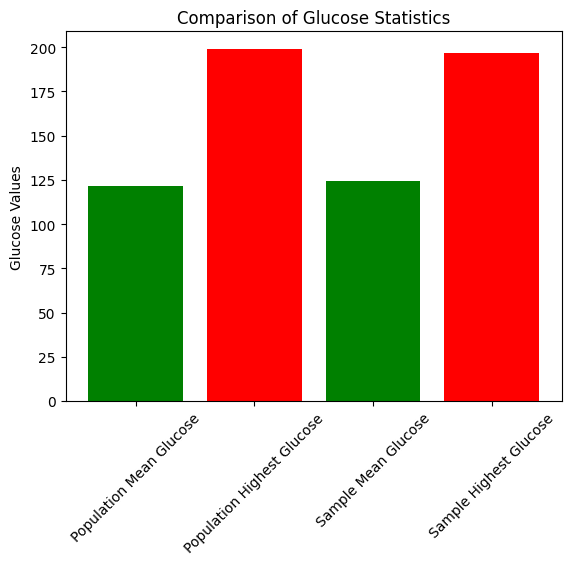

In [113]:
plt.bar(labels, values, color=['green', 'red', 'green', 'red'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.xticks(rotation=45)
plt.show()

In [114]:
np.random.seed(16)

sample = df.sample(25)

population_98th_percentile_bmi = df['BMI'].quantile(0.98)
print("Population 98th percentile BMI:",round(population_98th_percentile_bmi,2))
sample_98th_percentile_bmi = sample['BMI'].quantile(0.98)
print("Sample 98th percentile BMI:",round(sample_98th_percentile_bmi,2))

labels = ['Population 98th Percentile BMI', 'Sample 98th Percentile BMI']
values = [population_98th_percentile_bmi, sample_98th_percentile_bmi]

Population 98th percentile BMI: 47.77
Sample 98th percentile BMI: 37.14


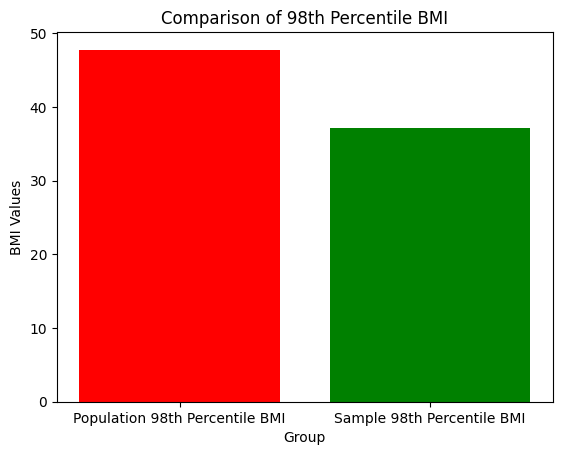

In [115]:
plt.bar(labels, values, color=['red', 'green'])
plt.title('Comparison of 98th Percentile BMI')
plt.xlabel('Group')
plt.ylabel('BMI Values')
plt.show()

Population Mean BP: 72.41
Population Standard BP: 12.37
Population Percentile BP: 72.0


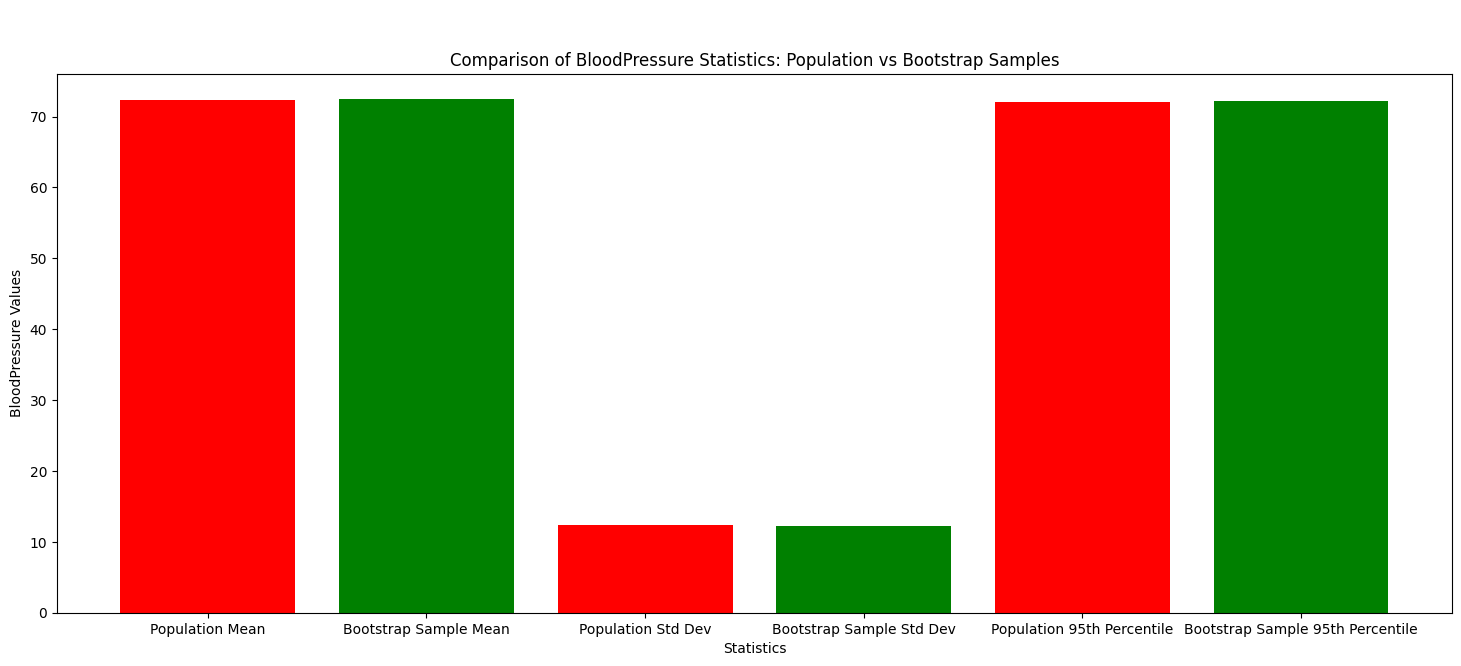

In [116]:
def bootstrap_statistics(data, n_bootstrap_samples=500, sample_size=150):
    bs_means = []
    bs_stds = []
    bs_percentiles = []

    for _ in range(n_bootstrap_samples):
        bootstrap_sample = data.sample(n=sample_size, replace=True)
        bs_means.append(np.mean(bootstrap_sample['BloodPressure']))
        bs_stds.append(np.std(bootstrap_sample['BloodPressure']))
        bs_percentiles.append(np.nanpercentile(bootstrap_sample['BloodPressure'], 50))

    return bs_means, bs_stds, bs_percentiles

bs_means, bs_stds, bs_percentiles = bootstrap_statistics(df)


population_mean = np.mean(df['BloodPressure'])
print("Population Mean BP:", round(population_mean, 2))

population_std_dev = np.std(df['BloodPressure'])
print("Population Standard BP:", round(population_std_dev, 2))

population_percentile = np.nanpercentile(df['BloodPressure'], 50)
print("Population Percentile BP:", round(population_percentile, 2))

labels = ['Population Mean', 'Bootstrap Sample Mean', 'Population Std Dev', 'Bootstrap Sample Std Dev', 'Population 95th Percentile', 'Bootstrap Sample 95th Percentile']
values = [population_mean, np.mean(bs_means), population_std_dev, np.mean(bs_stds), population_percentile, np.mean(bs_percentiles)]
plt.figure(figsize=(18, 7))
plt.bar(labels, values, color=['red', 'green', 'red', 'green', 'red', 'green'])
plt.title('\n\nComparison of BloodPressure Statistics: Population vs Bootstrap Samples')
plt.xlabel('Statistics')
plt.ylabel('BloodPressure Values')
plt.show()

Results:

Statistics on Glucose:

The population's mean glucose value is somewhat lower than the sample's, and the sample's highest glucose value is also lower. This suggests that the sample may have a somewhat higher average glucose level and fewer very high glucose readings than the population. This implies that, in comparison to the population, the sample may have fewer extremely high glucose results and a somewhat lower average glucose level.

BMI Data:

The BMI of the sample is substantially lower than the population's, falling below the 98th percentile. This implies that fewer individuals in the sample have excessively high BMI levels relative to the population.

Statistics about Blood Pressure (BP):

The blood pressure mean and standard deviation for the samples should be quite close to population values due to the nature of bootstrapping. However, the median blood pressure, or 50th percentile, in the bootstrap samples would also likely be near the population average.

